# Random walker

The following code/function handle both unweighted and weighted graphs, and also allows for a non-zero probability of walkers staying at their current node. If the graph is weighted, the weights parameter should be a dictionary where keys are edge tuples and values are the corresponding edge weights. The probabilities are then calculated as the weight of the edge divided by the total weight of all edges connected to the node.

It also checks for isolated nodes (nodes with no neighbors) and skips them, to avoid division by zero.

The function  returns the updated W (distribution of walkers) at the end, so you can see the final distribution of walkers after the random walk.

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [2]:
def random_walk(G, stop, W, p_stay=0, weights=None):
    """
    Performs a random walk on a graph.
    
    Parameters:
    G (networkx.classes.graph.Graph): The graph on which the random walk is performed.
    stop (int): The number of time steps to run the random walk.
    W (dict): A dictionary with the number of walkers at each node.
    p_stay (float, optional): The probability of staying at the current node. Defaults to 0.
    weights (dict, optional): A dictionary with edge weights, used for calculating probabilities. 
                               If None, all edges have equal weight. Defaults to None.
                               
    Returns:
    dict: Updated W with the final distribution of walkers.
    """
    
    # Prepare for weighted graph
    if weights is not None:
        nx.set_edge_attributes(G, weights, 'weight')

    t = 0
    N = G.number_of_nodes()
    nodes = list(G.nodes())

    while t < stop:
        temp = {node: 0 for node in nodes} # creating temprory empty dict 
        for source in nodes:
            # Retrieve neighbors
            neighbors = list(G.neighbors(source))
            if not neighbors:
                # If node is isolated, move on
                continue

            # Calculate probabilities
            if weights is None:
                # Unweighted case: probability 1/degree, considering p_stay
                degree = G.degree(source)
                prob = [(1 - p_stay) / degree for _ in neighbors]
            else:
                # Weighted case: probability proportional to edge weight, considering p_stay
                total_weight = sum(G[source][neighbor]['weight'] for neighbor in neighbors)
                prob = [(1 - p_stay) * G[source][neighbor]['weight'] / total_weight for neighbor in neighbors]

            prob.append(p_stay)  # Probability of staying at the current node

            # Perform the random walk
            targets = neighbors + [source]  # Include the current node as a possible target (stay)
            output = np.random.multinomial(W[source], prob)

            # Update temp with the results
            for target, walkers in zip(targets, output):
                temp[target] += walkers

        # Update W with the new distribution
        W = temp

        t += 1

    return W


### Example-1 ("Karate Club" network)
let's use the networkx built-in "Karate Club" network for this purpose. The "Karate Club" is a social network of a university karate club, described in the study "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary.

In this graph, each node represents a member of the club, and each edge represents a tie between two members.

**In this example**:

- The Karate Club graph is loaded and the initial distribution of walkers is set to 10 at each node.
- The random_walk function is called to perform the random walk for 10 time steps, with a 10% probability of each walker staying at their current node in each step.
- The final distribution of walkers is then visualized using networkx and matplotlib. The color of each node represents the number of walkers at that node, with darker colors indicating more walkers. The color bar on the side shows the corresponding number of walkers for each color.
- Note that due to the random nature of the random walk, the results will vary each time you run this code.

C:\Users\ACHARYA Kishor\AppData\Local\Temp\ipykernel_4248\3449818440.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Blues))


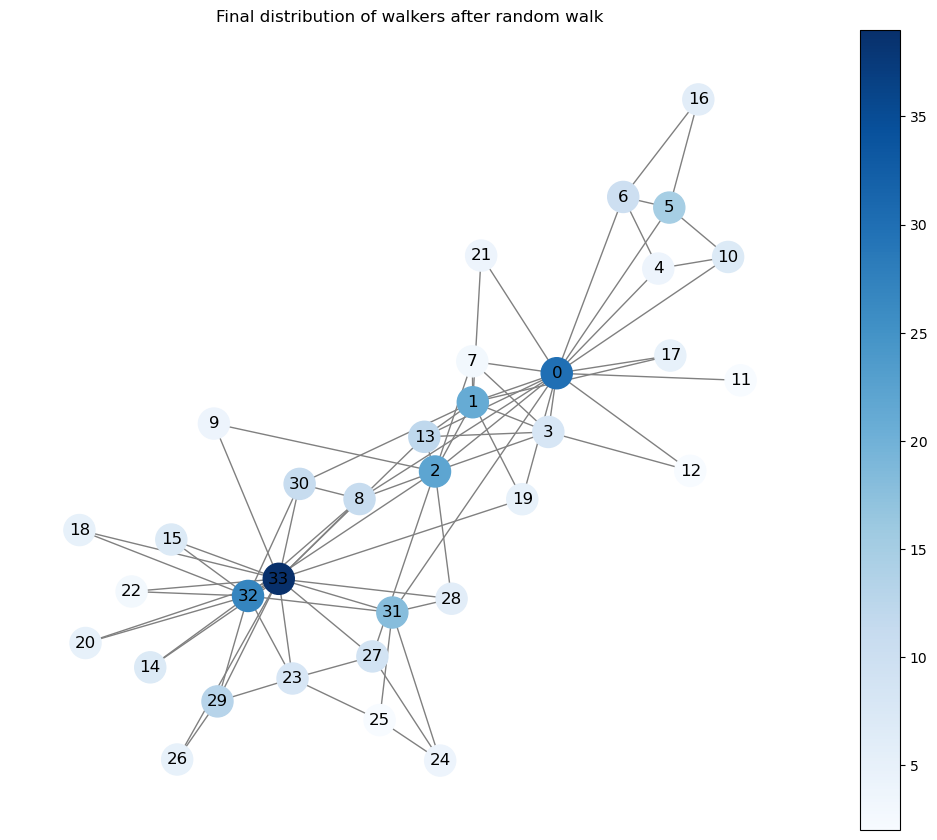

In [7]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Initialize walkers uniformly distributed
W = {node: 10 for node in G.nodes()}

# Perform the random walk
stop = 10
W_final = random_walk(G, stop, W, p_stay=0.1)

# Visualize the final distribution of walkers
plt.figure(figsize=(10, 8))
node_colors = [W_final[node] for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.Blues, node_size=500, edge_color='gray')
plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Blues))
plt.title('Final distribution of walkers after random walk')
plt.show()


### Example-2 (Florentine Families graph)

Let's use the Florentine Families graph as an example, which is a social network of Florentine families in the 15th century. We'll also demonstrate how to use edge weights in this example.



**In this example**:

- We load the Florentine Families graph using the built-in NetworkX function.
- We create a hypothetical set of edge weights using a dictionary comprehension and np.random.rand(), which generates a random float between 0 and 1.
- We initialize the walkers distribution W such that each node starts with 20 walkers.
- We perform the random walk using our function, with a stop condition of 20 time steps and a stay probability of 0.2 (i.e., 20% chance for a walker to stay at its current node in each time step).
- The final distribution of walkers is visualized in a similar way as in the previous example, but this time using the "Oranges" color map.

C:\Users\ACHARYA Kishor\AppData\Local\Temp\ipykernel_4248\955610715.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Oranges))


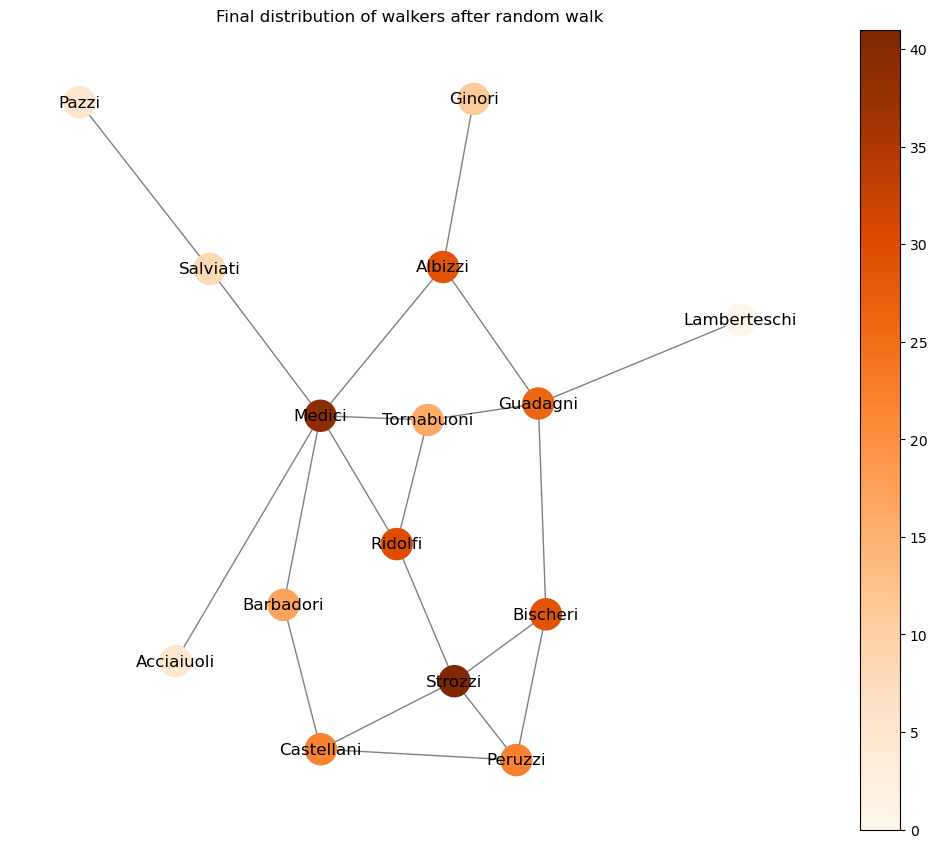

In [9]:
# Load the Florentine Families graph
G = nx.florentine_families_graph()

# Assume some hypothetical edge weights
weights = {(u, v): np.random.rand() for u, v in G.edges()}

# Initialize walkers uniformly distributed
W = {node: 20 for node in G.nodes()}

# Perform the random walk
stop = 20
W_final = random_walk(G, stop, W, p_stay=0.2, weights=weights)

# Visualize the final distribution of walkers
plt.figure(figsize=(10, 8))
node_colors = [W_final[node] for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.Oranges, node_size=500, edge_color='gray')
plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Oranges))
plt.title('Final distribution of walkers after random walk')
plt.show()


### Example-3 ("Davis Southern Women" graph)

let's use the "Davis Southern Women" graph for another example. This graph represents observed attendance at 14 social events by 18 Southern women. The graph is bipartite (i.e., nodes can be divided into two sets, Women and Events, and edges only connect nodes from different sets).

**In this example**:

- The Davis Southern Women graph is loaded using the built-in NetworkX function.
- We initialize the walkers distribution W such that each node starts with 30 walkers.
- We perform the random walk using our function, with a stop condition of 30 time steps and a stay probability of 0.3 (i.e., 30% chance for a walker to stay at its current node in each time step).
- The final distribution of walkers is visualized, this time using the "Purples" color map.

C:\Users\ACHARYA Kishor\AppData\Local\Temp\ipykernel_4248\3975790657.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Purples))


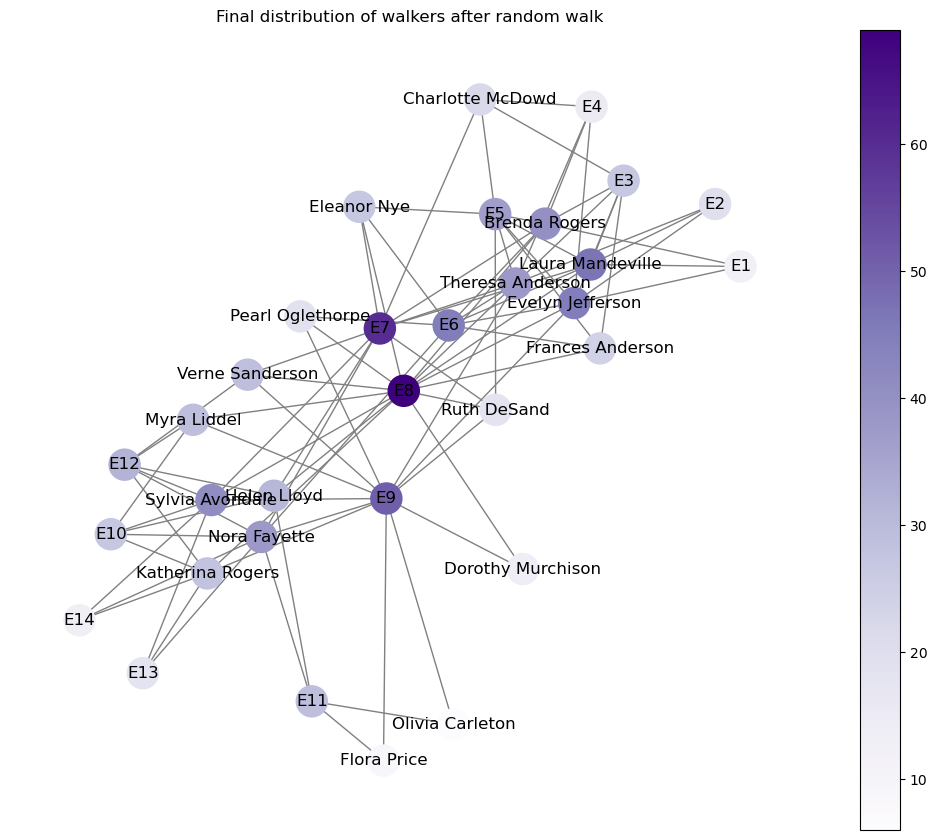

In [10]:
# Load the Davis Southern Women graph
G = nx.davis_southern_women_graph()

# Initialize walkers uniformly distributed
W = {node: 30 for node in G.nodes()}

# Perform the random walk
stop = 30
W_final = random_walk(G, stop, W, p_stay=0.3)

# Visualize the final distribution of walkers
plt.figure(figsize=(10, 8))
node_colors = [W_final[node] for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.Purples, node_size=500, edge_color='gray')
plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Purples))
plt.title('Final distribution of walkers after random walk')
plt.show()


# Random walker with visits

keep track of the number of times each node has been visited during the random walk by modifying the random_walkfunction to include a counter for each node. Let's create a new function called random_walk_with_visits

In [13]:
def random_walk_with_visits(G, stop, W, p_stay=0.0, weights=None):
    """
    Perform a random walk on a given graph.

    Arguments:
    - G: the graph
    - stop: the number of time steps to perform
    - W: a dictionary mapping nodes to initial number of walkers
    - p_stay: probability of a walker staying at its current node
    - weights: a dictionary mapping edges to their weights
    
    Returns a tuple with two dictionaries:
    - the final number of walkers at each node
    - the number of visits at each node
    """
    t = 0
    N = G.number_of_nodes()
    visits = {node: 0 for node in G.nodes()}  # Initialize the visits counter

    while t < stop:
        temp = np.zeros(N, int)
        for source in G.nodes():
            neighbors = list(G.neighbors(source))
            prob = []
            for i in neighbors:
                prob.append(weights.get((source, i), 1) if weights else 1 / len(neighbors))

            # Add the stay probability
            prob = [p * (1 - p_stay) for p in prob]
            prob.append(p_stay)

            output = np.random.multinomial(W[source], prob, size=1)[0]

            targets = neighbors + [source]  # The last target is the source itself

            # Update temp with the results
            for target, walkers in zip(targets, output):
                temp[target] += walkers
                if target != source:  # Do not count staying as a visit
                    visits[target] += walkers

        # After the loop across all nodes, update the values of W
        for i in G.nodes():
            W[i] = temp[i]
        t += 1

    return W, visits


**Example**:

Lets perform the random walk on the Karate Club graph as before, but this time using random_walk_with_visits. Finally, we plot the number of visits at each node using a bar plot. Each bar represents a node, and the height of the bar represents the number of visits at that node.


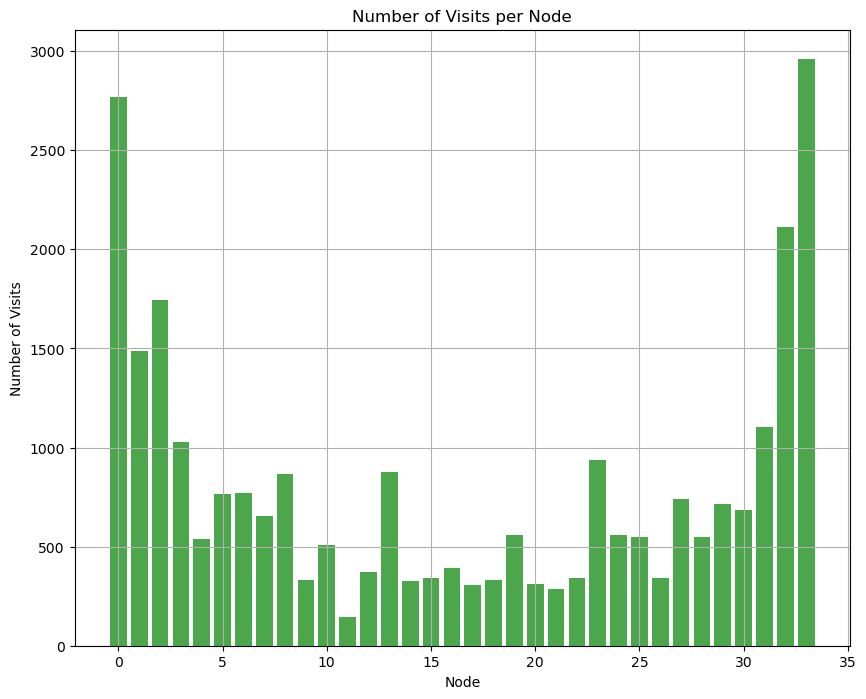

In [15]:
# Test the new function
G = nx.karate_club_graph()
W = {node: 10 for node in G.nodes()}  # Start with 10 walkers at each node
stop = 100
W_final, visits = random_walk_with_visits(G, stop, W, p_stay=0.2)

# Plot the number of visits
plt.figure(figsize=(10, 8))
plt.bar(visits.keys(), visits.values(), color='green', alpha=0.7)
plt.xlabel('Node')
plt.ylabel('Number of Visits')
plt.title('Number of Visits per Node')
plt.grid(True)
plt.show()

***Plot-1*** : Plotting number of visits VS Nodes

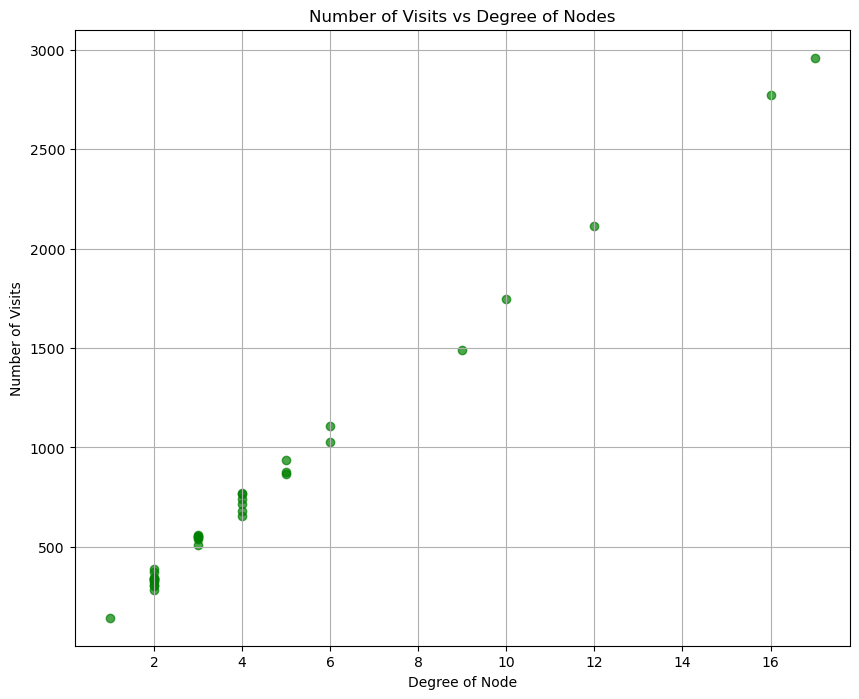

In [16]:
#Plotting the number of visits versus the degree of nodes

# Compute degrees of nodes
degrees = dict(G.degree())

# Prepare data for scatter plot
degrees_list = [degrees[node] for node in G.nodes()]
visits_list = [visits[node] for node in G.nodes()]

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(degrees_list, visits_list, color='green', alpha=0.7)
plt.xlabel('Degree of Node')
plt.ylabel('Number of Visits')
plt.title('Number of Visits vs Degree of Nodes')
plt.grid(True)
plt.show()


***Plot-2*** : lotting the number of visits versus the degree of nodes

In this code, we first compute the degrees of the nodes using the G.degree() method, which returns a DegreeView object that we convert to a dictionary. We then prepare two lists: one for the degrees of the nodes, and another for the number of visits at the nodes. Finally, we create a scatter plot where each point represents a node, the x-coordinate of the point is the degree of the node, and the y-coordinate is the number of visits at the node.

The plot shows a positive trend, that would indicate that nodes with a higher degree tend to get visited more often. However, the specific trend will depend on the nature of the graph and the parameters of the random walk.